In [215]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imageio
import math
imageio.plugins.ffmpeg.download()
%matplotlib inline
import os
input_images = os.listdir("test_images/")

('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))


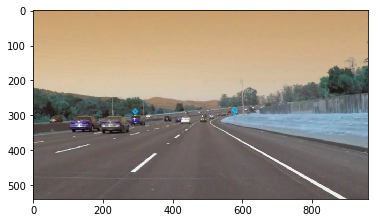

In [216]:
image = cv2.imread('test_images/solidWhiteCurve.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

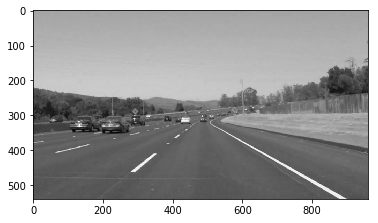

In [217]:
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
plt.imshow(gray, cmap='gray')

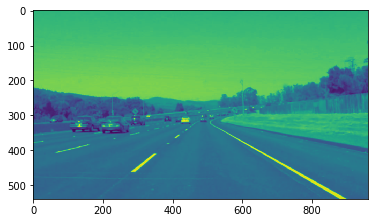

In [218]:
# Gaussian smoothing
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
plt.imshow(blur_gray)
mpimg.imsave("Test_images_output/solidWhiteCurve_blur.png", blur_gray)


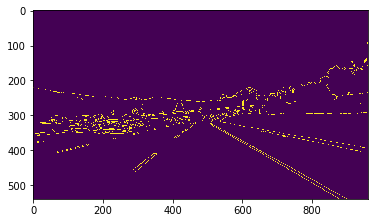

In [219]:
# Canny Edge
low_threshold = 50
high_threshold = 150

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges)
mpimg.imsave("Test_images_output/solidWhiteCurve_canny.png", edges)

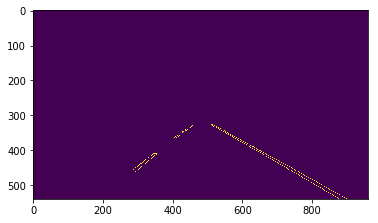

In [220]:
#defining a blank mask
mask = np.zeros_like(edges)

if len(image.shape) > 2:
        channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
else:
        ignore_mask_color = 255

imshape = image.shape   

vertices = np.array([[(100,imshape[0]), (440, 325), (550, 325), (imshape[1],imshape[0])]], dtype=np.int32)
      
#filling pixels inside the polygon defined by "vertices" with the fill color    
cv2.fillPoly(mask, vertices, ignore_mask_color)

#returning the image only where mask pixels are nonzero
masked_edges = cv2.bitwise_and(edges, mask)

plt.imshow(masked_edges)
mpimg.imsave("Test_images_output/solidWhiteCurve_masked_edges.png", masked_edges)


In [221]:

# Hough Transform
rho = 3 # distance resolution in pixels of the Hough grid
theta = 1 * np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 25 # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)


In [222]:
left_x = []
left_y = []
right_x = []
right_y = []

sizeX = image.shape[1]
sizeY = image.shape[0]
for line in lines:
    x1, y1, x2, y2 = line[0]
    if abs(x1-x2) == 0:
        slope = float("inf")
    else:
        slope = (y2 - y1)/(x2 - x1)

    if slope > -0.5 and x1 > sizeX/2 and x2 > sizeX/2:
        right_x.append(x1)
        right_x.append(x2)
        right_y.append(y1)
        right_y.append(y2)
    elif slope < 0.5 and x1 < sizeX/2 and x2 < sizeX/2:
        left_x.append(x1)
        left_x.append(x2)
        left_y.append(y1)
        left_y.append(y2)


In [230]:
r, r_b = np.polyfit(right_x, right_y, 1)
l, l_b = np.polyfit(left_x, left_y, 1)

y1 = image.shape[0]
y2 = image.shape[0] * (1 - 0.35)

x1r = (y1 - r_b) / r
x2r = (y2 - r_b) / r
x1l = (y1 - l_b) / l
x2l = (y2 - l_b) / l


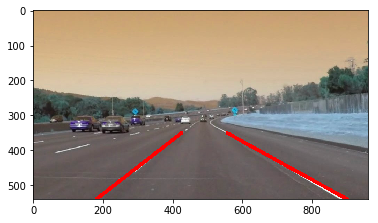

In [231]:
color = [255,0,0]
thickness = 10
cv2.line(image, (int(x1r), y1), (int(x2r), int(y2)), color, thickness)
cv2.line(image, (int(x1l), y1), (int(x2l), int(y2)), color, thickness)

color_edges = np.dstack((edges, edges, edges)) 

lines_edges = cv2.addWeighted(image, 1, line_image, 1, 0) 
plt.figure()
plt.imshow(lines_edges)
mpimg.imsave("Test_images_output/solidWhiteCurve_lines_edges.png", gray)

In [210]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
def process_image(image):

    gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    plt.imshow(gray, cmap='gray')

# Gaussian smoothing
    kernel_size = 3
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    plt.imshow(blur_gray)
    
# Canny Edge Detector
    low_threshold = 50
    high_threshold = 150

    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    plt.imshow(edges)
    
    
    #defining a blank mask to start with
    mask = np.zeros_like(edges)

    if len(image.shape) > 2:
        channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255


#ignore_mask_color = 255
    imshape = image.shape   
#vertices = np.array([[(100,imshape[0]), (440, 325), (550, 325), (imshape[1],imshape[0])]], dtype=np.int32)

    vertices = np.array([[(100,imshape[0]), (440, 325), (550, 325), (imshape[1],imshape[0])]], dtype=np.int32)
      
#filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

#returning the image only where mask pixels are nonzero
    masked_edges = cv2.bitwise_and(edges, mask)

    plt.imshow(masked_edges)
    
        
    # Hough Transform
    rho = 3 # distance resolution in pixels of the Hough grid
    theta = 1 * np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15 # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 5 #minimum number of pixels making up a line
    max_line_gap = 25 # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image
    left_lane_lines_x = []
    left_lane_lines_y = []
    right_lane_lines_x = []
    right_lane_lines_y = []

    x_size = image.shape[1]
    y_size = image.shape[0]
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if abs(x1-x2) == 0:
            slope = float("inf")
        else:
            slope = (y2 - y1)/(x2 - x1)

        if slope > -0.5 and x1 > x_size/2 and x2 > x_size/2:
            right_lane_lines_x.append(x1)
            right_lane_lines_x.append(x2)
            right_lane_lines_y.append(y1)
            right_lane_lines_y.append(y2)
        elif slope < 0.5 and x1 < x_size/2 and x2 < x_size/2:
            left_lane_lines_x.append(x1)
            left_lane_lines_x.append(x2)
            left_lane_lines_y.append(y1)
            left_lane_lines_y.append(y2)

    r_m, r_b = np.polyfit(right_lane_lines_x, right_lane_lines_y, 1)
    l_m, l_b = np.polyfit(left_lane_lines_x, left_lane_lines_y, 1)

    y1 = image.shape[0]
    y2 = image.shape[0] * (1 - 0.35)


    r_x1 = (y1 - r_b) / r_m
    r_x2 = (y2 - r_b) / r_m

    l_x1 = (y1 - l_b) / l_m
    l_x2 = (y2 - l_b) / l_m

    color = [255,0,0]
    thickness = 10
    cv2.line(image, (int(r_x1), y1), (int(r_x2), int(y2)), color, thickness)
    cv2.line(image, (int(l_x1), y1), (int(l_x2), int(y2)), color, thickness)

    color_edges = np.dstack((edges, edges, edges)) 
    lines_edges = cv2.addWeighted(image, 1, line_image, 1, 0) 
#plt.figure()
#  plt.imshow(lines_edges)

    return lines_edges


In [179]:

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


 99%|███████████████████████████████████████████████████████████████████████████████▎| 125/126 [00:04<00:00, 26.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 



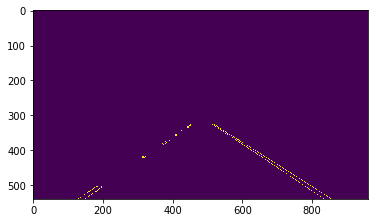

In [180]:

white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

In [181]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


 99%|███████████████████████████████████████████████████████████████████████████████▎| 125/126 [00:05<00:00, 24.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 6.09 s


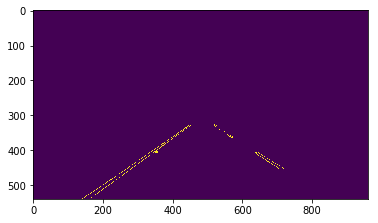

In [164]:

yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [166]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))